In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df=pd.read_csv(r"C:\Users\Bhupender Singh\Downloads\bitcoin.csv")

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2713 entries, 0 to 2712
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2713 non-null   object 
 1   Open       2713 non-null   float64
 2   High       2713 non-null   float64
 3   Low        2713 non-null   float64
 4   Close      2713 non-null   float64
 5   Adj Close  2713 non-null   float64
 6   Volume     2713 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 148.5+ KB


In [7]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.shape

(2713, 7)

In [12]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [13]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2.713000e+03
mean,11311.041069,11614.292482,10975.555057,11323.914637,11323.914637,1.470462e+10
std,16106.428891,16537.390649,15608.572560,16110.365010,16110.365010,2.001627e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,606.396973,609.260986,604.109985,606.718994,606.718994,7.991080e+07
50%,6301.569824,6434.617676,6214.220215,6317.609863,6317.609863,5.098183e+09
75%,10452.399414,10762.644531,10202.387695,10462.259766,10462.259766,2.456992e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


EDA


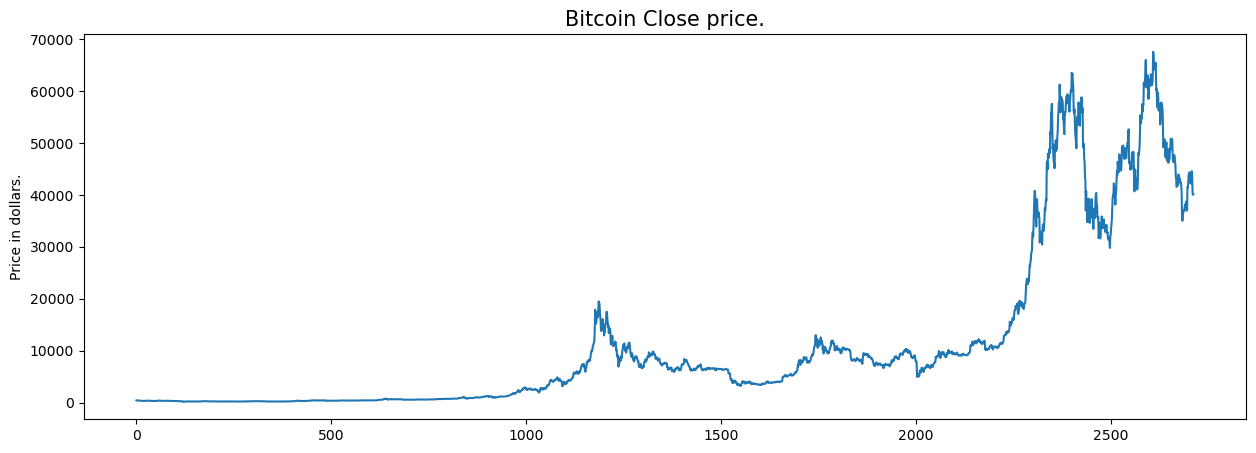

In [16]:
plt.figure(figsize=(15, 5))
plt.plot(df['Close'])
plt.title('Bitcoin Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [17]:
splitted = df['Date'].str.split('-', expand=True)

df['year'] = splitted[0].astype('int')
df['month'] = splitted[1].astype('int')
df['day'] = splitted[2].astype('int')

# Convert the 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date']) 

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,2014,9,17
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,2014,9,18
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,2014,9,19
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,2014,9,20
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,2014,9,21


In [19]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day,is_quarter_end
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,2014,9,17,1
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,2014,9,18,1
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,2014,9,19,1
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,2014,9,20,1
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,2014,9,21,1


In [20]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming df is already defined
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

# Scaling the features
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Split the data into training and validation (test) sets
X_train, X_valid, Y_train, Y_valid = train_test_split(features, target, test_size=0.3, random_state=42)

In [23]:
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day,is_quarter_end,open-close,low-high,target
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,2014,9,17,1,8.529999,-15.752014,0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,2014,9,18,1,32.419983,-43.755981,0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,2014,9,19,1,29.307007,-43.302978,1
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,2014,9,20,1,-14.230988,-33.412994,0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,2014,9,21,1,9.263977,-19.244995,1


In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
le=LogisticRegression()

In [29]:
logistic=le.fit(X_train,Y_train)

In [31]:
y_pred_logistic=logistic.predict(X_valid)

In [32]:
from sklearn.metrics import mean_squared_error , mean_absolute_error 

In [36]:
mae=mean_absolute_error(Y_valid,y_pred_logistic)
mse=mean_squared_error(Y_valid,y_pred_logistic)
rmse=np.sqrt(mse)

print("mae",mae)
print("mse",mse)
print("rmse",rmse)

mae 0.45454545454545453
mse 0.45454545454545453
rmse 0.674199862463242


In [44]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

svc = SVC(kernel='linear', class_weight='balanced')


svc.fit(X_train, Y_train)

y_pred_svc = svc.predict(X_valid)



In [45]:
print("Accuracy:", accuracy_score(Y_valid, y_pred_svc))
print(classification_report(Y_valid, y_pred_svc))


Accuracy: 0.5135135135135135
              precision    recall  f1-score   support

           0       0.45      0.35      0.39       366
           1       0.55      0.65      0.59       448

    accuracy                           0.51       814
   macro avg       0.50      0.50      0.49       814
weighted avg       0.50      0.51      0.50       814



In [59]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

model = XGBClassifier(n_estimators=600, learning_rate=0.05, max_depth=4)

model.fit(X_train, Y_train)

y_pred_XGB = model.predict(X_valid)

print("Accuracy:", accuracy_score(Y_valid, y_pred_XGB))
print(classification_report(Y_valid, y_pred_XGB))


Accuracy: 0.4877149877149877
              precision    recall  f1-score   support

           0       0.41      0.31      0.35       366
           1       0.53      0.63      0.58       448

    accuracy                           0.49       814
   macro avg       0.47      0.47      0.46       814
weighted avg       0.47      0.49      0.48       814

